CellChat inference and analysis of spatially proximal cell-cell communication from spatially resolved transcriptomics (multiple datasets)

In [1]:
#ptm = Sys.time()

library(CellChat)
library(Seurat)
library(patchwork)
library(ComplexHeatmap)
library(grid)
options(stringsAsFactors = FALSE)

Loading required package: dplyr

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Warning message:
“package ‘Seurat’ was built under R version 4.2.3”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.2.3”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.2.3”

Attaching package: ‘SeuratObject’


The following object is masked from ‘package:Bio

In [4]:
results_folder ='/run/user/1804238067/gvfs/sftp:host=clust1-sub,user=lythgo02/mnt/nas-data/fmlab/group_folders/lythgo02/OV_visium/emily/cell2location/cellTrek/cellchat/'

In [52]:
#cellTrekObs <- readRDS(paste0(ov_visium, "ov_cellTrek_obj.rds"))
#cell2loc = '/run/user/1804238067/gvfs/sftp:host=clust1-sub-1,user=lythgo02/mnt/scratchc/fmlab/lythgo02/OV_visium/emily/cell2location/'
#adata_vis_match <- zellkonverter::readH5AD(file.path(cell2loc, "final_adata_vis_match.h5ad"))

cell2loc = '/run/user/1804238067/gvfs/sftp:host=clust1-sub,user=lythgo02/mnt/nas-data/fmlab/group_folders/lythgo02/OV_visium/emily/cell2location/'
#ovTrainAll <- readRDS(paste0(cell2loc, "cellTrek/celltrek_results_ntree1000_p500_celltrek.rds"))
ovCellTrekList <- readRDS(paste0(cell2loc, "cellTrek/celltrek_results_updated.rds"))

For one sample at a time

In [ ]:
ovCellTrek <- adata_vis_match[[1]]
# 1. Extract expression and meta
data.input <- GetAssayData(ovCellTrek, slot = "data")  # or "counts"
meta <- ovCellTrek@meta.data
# 2. Create CellChat object
cellchat <- CellChat::createCellChat(object = data.input, meta = meta, group.by = "cell_type")
CellChatDB <- CellChatDB.mouse  # or .human
cellchat@DB <- CellChatDB
cellchat <- subsetData(cellchat)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
cellchat <- computeCommunProb(cellchat)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)
# all predicted interactions (data.frame)
comm <- subsetCommunication(cellchat)
head(comm)
# save
write.csv(comm, file = file.path(results_folder, "ov1_cellchat_all_interactions.csv"), row.names = FALSE)
# list pathways and group sizes
signaling_paths <- names(cellchat@netP)
print(signaling_paths)
groupSize <- as.numeric(table(cellchat@idents))
groupSize


For all in a loop

In [30]:

cellchat_list <- list()

for (i in seq_along(ovCellTrekList)) {
  
  sample_name <- if (!is.null(names(ovCellTrekList)) && names(ovCellTrekList)[i] != "") {
    names(ovCellTrekList)[i]
  } else {
    paste0("sample_", i)
  }
  message("Creating CellChat object for ", sample_name)
  
  ovCellTrek <- ovCellTrekList[[i]]
  
  # 1. Extract expression & metadata
  data.input <- GetAssayData(ovCellTrek, slot = "data")
  meta <- ovCellTrek@meta.data
  
  # Ensure you have a grouping column (rename if needed)
  # e.g. your column might be "cell_type_collapsed"
  if (!"cell_type" %in% colnames(meta) && "cell_type_collapsed" %in% colnames(meta)) {
    meta$cell_type <- meta$cell_type_collapsed
  }
  
  # 2. Create CellChat object
  cellchat <- CellChat::createCellChat(
    object = data.input,
    meta = meta,
    group.by = "cell_type"
  )
  
  cellchat_list[[sample_name]] <- cellchat
}

# --- Optional: preview what was created ---
cellchat_list


Creating CellChat object for OV_1



[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated B naive resting CD4 CD8 Cycling Plasma Cells Dendritic Cells Endothelial Macrophage Mesenchymal Monocytes Neutrophils NK_cell Plasma Cells Th1 Th17 Treg Tumour 


Creating CellChat object for OV_2



[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated B naive resting CD4 CD8 Cycling Plasma Cells Dendritic Cells Endothelial Macrophage Mesenchymal Monocytes Neutrophils NK_cell Plasma Cells Th1 Th17 Treg Tumour 


Creating CellChat object for OV_3



[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated B naive resting CD4 CD8 Dendritic Cells Endothelial Macrophage Mesenchymal Monocytes Neutrophils NK_cell Plasma Cells Th1 Th17 Treg Tumour 


Creating CellChat object for OV_4



[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated B naive resting CD4 CD8 Cycling Plasma Cells Dendritic Cells Endothelial Macrophage Mesenchymal Monocytes Neutrophils NK_cell Plasma Cells Th1 Th17 Treg Tumour 


Creating CellChat object for OV_5



[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated B naive resting CD4 CD8 Dendritic Cells Endothelial Macrophage Mesenchymal Monocytes Neutrophils NK_cell Plasma Cells Th1 Th17 Treg Tumour 


Creating CellChat object for OV_6



[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated B naive resting CD4 CD8 Cycling Plasma Cells Dendritic Cells Endothelial Macrophage Mesenchymal Monocytes Neutrophils NK_cell Plasma Cells Th1 Th17 Treg Tumour 


$OV_1
An object of class CellChat created from a single dataset 
 14542 genes.
 9276 cells. 
CellChat analysis of single cell RNA-seq data! 

$OV_2
An object of class CellChat created from a single dataset 
 14542 genes.
 13696 cells. 
CellChat analysis of single cell RNA-seq data! 

$OV_3
An object of class CellChat created from a single dataset 
 14542 genes.
 10291 cells. 
CellChat analysis of single cell RNA-seq data! 

$OV_4
An object of class CellChat created from a single dataset 
 14542 genes.
 5964 cells. 
CellChat analysis of single cell RNA-seq data! 

$OV_5
An object of class CellChat created from a single dataset 
 14542 genes.
 9080 cells. 
CellChat analysis of single cell RNA-seq data! 

$OV_6
An object of class CellChat created from a single dataset 
 14542 genes.
 5391 cells. 
CellChat analysis of single cell RNA-seq data! 


In [31]:
# Load mouse ligand-receptor database
CellChatDB <- CellChatDB.mouse
for (i in names(cellchat_list)) {
  cellchat_list[[i]]@DB <- CellChatDB
  cellchat_list[[i]] <- subsetData(cellchat_list[[i]])           # subset relevant genes
  cellchat_list[[i]] <- identifyOverExpressedGenes(cellchat_list[[i]])
  cellchat_list[[i]] <- identifyOverExpressedInteractions(cellchat_list[[i]])
  cellchat_list[[i]] <- computeCommunProb(cellchat_list[[i]])
  cellchat_list[[i]] <- computeCommunProbPathway(cellchat_list[[i]])
  cellchat_list[[i]] <- aggregateNet(cellchat_list[[i]])
}


Issue identified!! Please check the official Gene Symbol of the following genes:  
 H2-BI H2-Ea-ps 
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-11-12 13:51:50]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-11-12 13:55:32]"
Issue identified!! Please check the official Gene Symbol of the following genes:  
 H2-BI H2-Ea-ps 
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-11-12 13:56:16]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-11-12 14:00:18]"
Issue identified!! Please check the official Gene Symbol of the following genes:  
 H2-BI H2-Ea-ps 
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-11-12 14:00:50]"
[1] ">>> CellCh

In [32]:

comm_list=list()

for (sample_name in names(cellchat_list)) {
  cellchat <- cellchat_list[[sample_name]]
  
  # Extract all significant interactions
  comm <- subsetCommunication(cellchat)
  
  # Save to CSV
  write.csv(
    comm,
    file = file.path(results_folder, paste0(sample_name, "_cellchat_all_interactions.csv")),
    row.names = FALSE
  )
  
  # Store in a list for later combination
  comm_list[[sample_name]] <- comm
}

# --- Optional: combine all into one dataframe ---
comm_all <- bind_rows(comm_list, .id = "sample")

# Quick preview
head(comm_all)

,sample,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,evidence
,<chr>,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>
1,OV_1,B naive activated,B naive activated,Tgfb1,TGFbR1_R2,0.02177701,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
2,OV_1,B naive resting,B naive activated,Tgfb1,TGFbR1_R2,0.02292956,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
3,OV_1,CD4,B naive activated,Tgfb1,TGFbR1_R2,0.01804501,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
4,OV_1,CD8,B naive activated,Tgfb1,TGFbR1_R2,0.02235130,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
5,OV_1,Dendritic Cells,B naive activated,Tgfb1,TGFbR1_R2,0.01184832,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
6,OV_1,Endothelial,B naive activated,Tgfb1,TGFbR1_R2,0.01188053,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350


Plot heatmap of interactions per sample 

In [9]:
plot_list <- lapply(names(cellchat_list), function(x){
    plot <- netVisual_heatmap(cellchat_list[[x]], measure="count", color.heatmap = "Blues")
      # Save each plot
 pdf(
    file = paste0(results_folder, x, "_heatmap.pdf"),
    width = 8,
    height = 6)
  ComplexHeatmap::draw(plot)
  dev.off()
  plot
})

names(plot_list) <- names(cellchat_list)

Do heatmap based on a single object 


Do heatmap based on a single object 


Do heatmap based on a single object 


Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Do heatmap based on a single object 


Do heatmap based on a single object 


Do heatmap based on a single object 


Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”


Merge pre and post and run cellchat comparisons

In [66]:
# Merge Seurat objects for Pre (1–3) and Post (4–6)
ov_pre  <- merge(ovCellTrekList[[1]], y = list(ovCellTrekList[[2]], ovCellTrekList[[3]]))
ov_post <- merge(ovCellTrekList[[4]], y = list(ovCellTrekList[[5]], ovCellTrekList[[6]]))


Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


Warning message:
“Key ‘slice1_’ taken, using ‘slice12_’ instead”
Warning message:
“Key ‘slice1_’ taken, using ‘slice13_’ instead”
Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message:
“Key ‘slice1_’ taken, using ‘slice12_’ instead”
Warning message:
“Key ‘slice1_’ taken, using ‘slice13_’ instead”


In [67]:
# Extract expression data
data_pre  <- GetAssayData(ov_pre,  slot = "data")
data_post <- GetAssayData(ov_post, slot = "data")

# Metadata (make sure rownames match the data colnames)
meta_pre  <- ov_pre@meta.data
meta_post <- ov_post@meta.data
rownames(meta_pre)  <- colnames(data_pre)
rownames(meta_post) <- colnames(data_post)


In [68]:
library(CellChat)

cellchat_pre  <- createCellChat(object = data_pre,  meta = meta_pre,  group.by = "cell_type")
cellchat_post <- createCellChat(object = data_post, meta = meta_post, group.by = "cell_type")


[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated B naive resting CD4 CD8 Cycling Plasma Cells Dendritic Cells Endothelial Macrophage Mesenchymal Monocytes Neutrophils NK_cell Plasma Cells Th1 Th17 Treg Tumour 
[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B naive activated B naive resting CD4 CD8 Cycling Plasma Cells Dendritic Cells Endothelial Macrophage Mesenchymal Monocytes Neutrophils NK_cell Plasma Cells Th1 Th17 Treg Tumour 


In [70]:
cellchat_pre

An object of class CellChat created from a single dataset 
 14542 genes.
 33263 cells. 
CellChat analysis of single cell RNA-seq data! 

In [72]:
CellChatDB <- CellChatDB.mouse

prep_group <- function(cellchat) {

  cellchat@DB <- CellChatDB
  cellchat <- subsetData(cellchat)
  cellchat <- identifyOverExpressedGenes(cellchat)
  cellchat <- identifyOverExpressedInteractions(cellchat)
  cellchat <- computeCommunProb(cellchat, raw.use = TRUE, population.size = TRUE)
  cellchat <- filterCommunication(cellchat, min.cells = 10)
  cellchat <- computeCommunProbPathway(cellchat)
  cellchat <- aggregateNet(cellchat)
  cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")
  return(cellchat)
}

cellchat_pre  <- prep_group(cellchat_pre)
cellchat_post <- prep_group(cellchat_post)


Issue identified!! Please check the official Gene Symbol of the following genes:  
 H2-BI H2-Ea-ps 
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-11-12 16:13:12]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-11-12 16:19:28]"
Issue identified!! Please check the official Gene Symbol of the following genes:  
 H2-BI H2-Ea-ps 
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-11-12 16:20:38]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-11-12 16:26:07]"


In [74]:
cellchat_cmp <- mergeCellChat(
  list(Pre = cellchat_pre, Post = cellchat_post),
  add.names   = c("Pre","Post"),
  cell.prefix = TRUE
)

Warning message in mergeCellChat(list(Pre = cellchat_pre, Post = cellchat_post), :
“Prefix cell names!”


The cell barcodes in merged 'meta' is  ov16_AAAGTGAGTGGTACAG.1_1 ov17_AAGTGAAGTATGCAAA.1_1 ov20_AGAGAATCAAACTCTG.1_1 ov20_GAGTCTATCGCCGAGT.1_1 ov20_GATAGAAGTACACTCA.1_1 ov20_GGCTGTGTCTGCATGA.1_1 


Warning message in mergeCellChat(list(Pre = cellchat_pre, Post = cellchat_post), :
“The cell barcodes in merged 'meta' is different from those in the used data matrix.
              We now simply assign the colnames in the data matrix to the rownames of merged 'mata'!”
Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



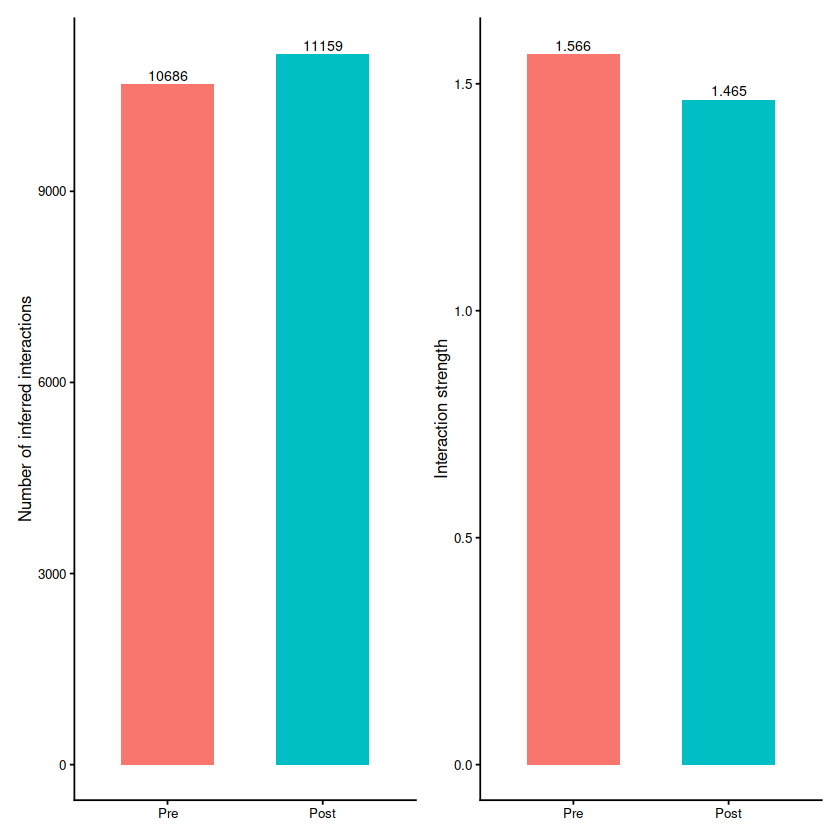

In [75]:
gg1 <- compareInteractions(cellchat_cmp, show.legend = F, group = c(1,2))
gg2 <- compareInteractions(cellchat_cmp, show.legend = F, group = c(1,2), measure = "weight")
gg1 + gg2

Show differential number of interactions or interaction strength using a heatmap. The top colored bar plot represents the sum of column of values displayed in the heatmap (incoming signaling). The right colored bar plot represents the sum of row of values (outgoing signaling). In the colorbar, red (or blue) represents increased(or decreased) signaling in the second dataset compared to the first one.

Do heatmap based on a merged object 


Do heatmap based on a merged object 




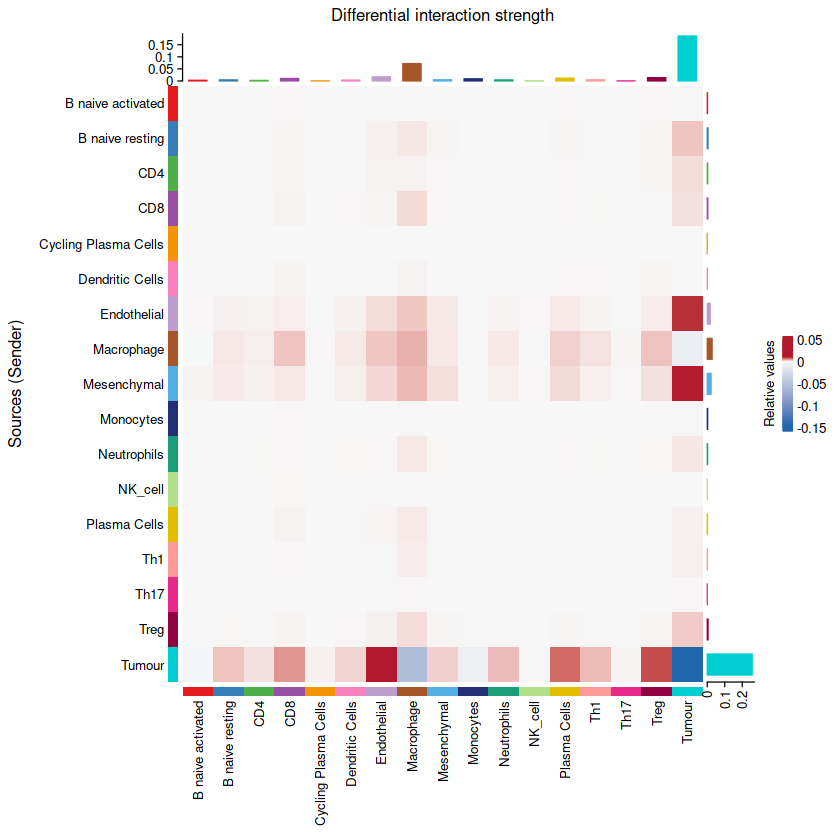

In [ ]:
gg1 <- netVisual_heatmap(cellchat_cmp)
#> Do heatmap based on a merged object
gg2 <- netVisual_heatmap(cellchat_cmp, measure = "weight")
#> Do heatmap based on a merged object


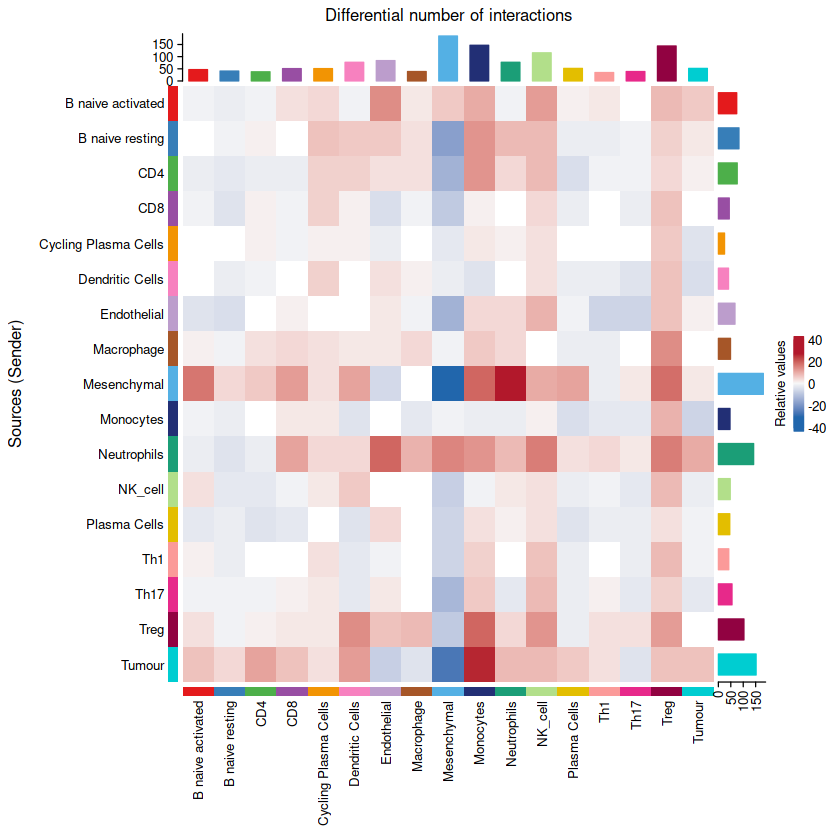

In [91]:
gg1

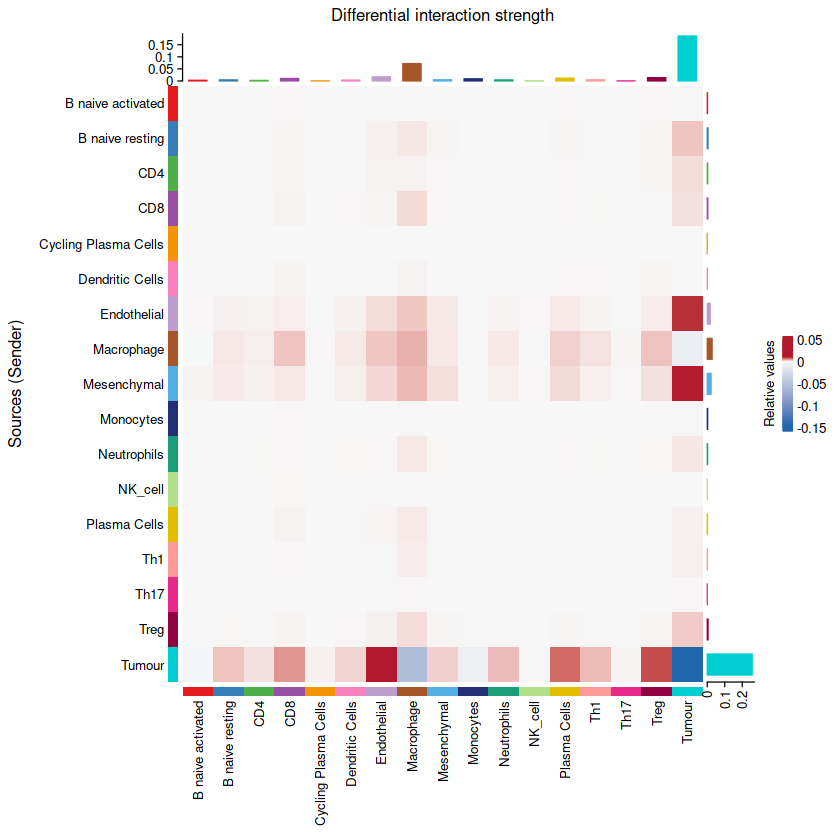

In [90]:
gg2

Do heatmap based on a single object 




png 
  2

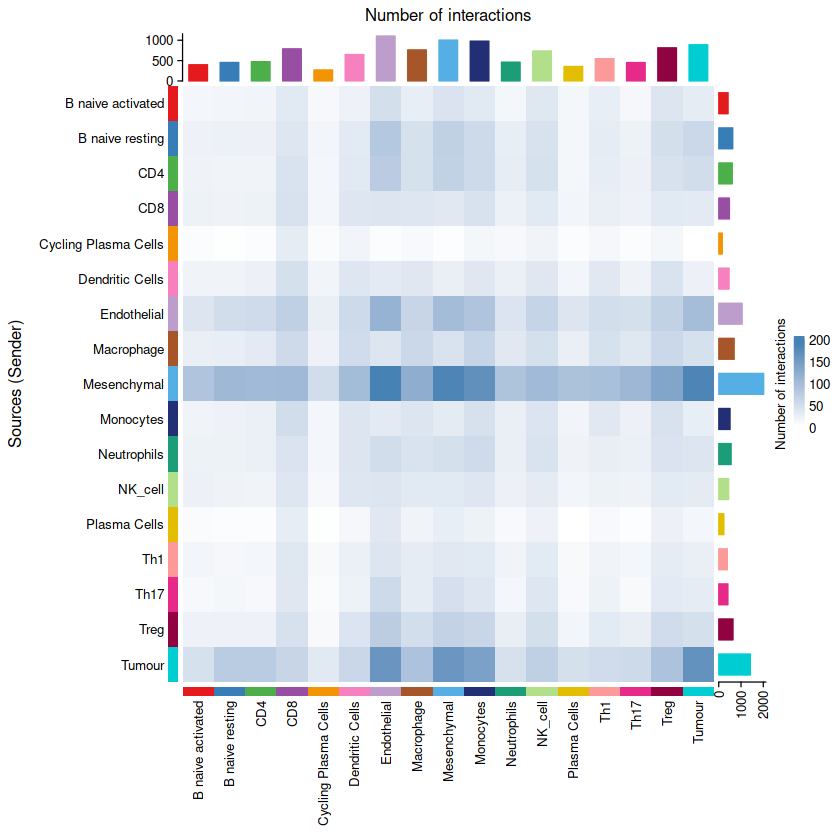

In [85]:

#Make the heatmap object (counts of significant LR pairs between sender→receiver)
ht <- netVisual_heatmap(
  object        = cellchat_post,
  measure       = "count",
  color.heatmap = c("white", "steelblue")
)

# 3. Draw to screen
ComplexHeatmap::draw(ht)

# 4. Save to PDF
pdf(
  file = file.path(results_folder, "CellChat_Post_heatmap.pdf"),
  width = 9,
  height = 8
)
ComplexHeatmap::draw(ht)
dev.off()

Do heatmap based on a single object 




png 
  2

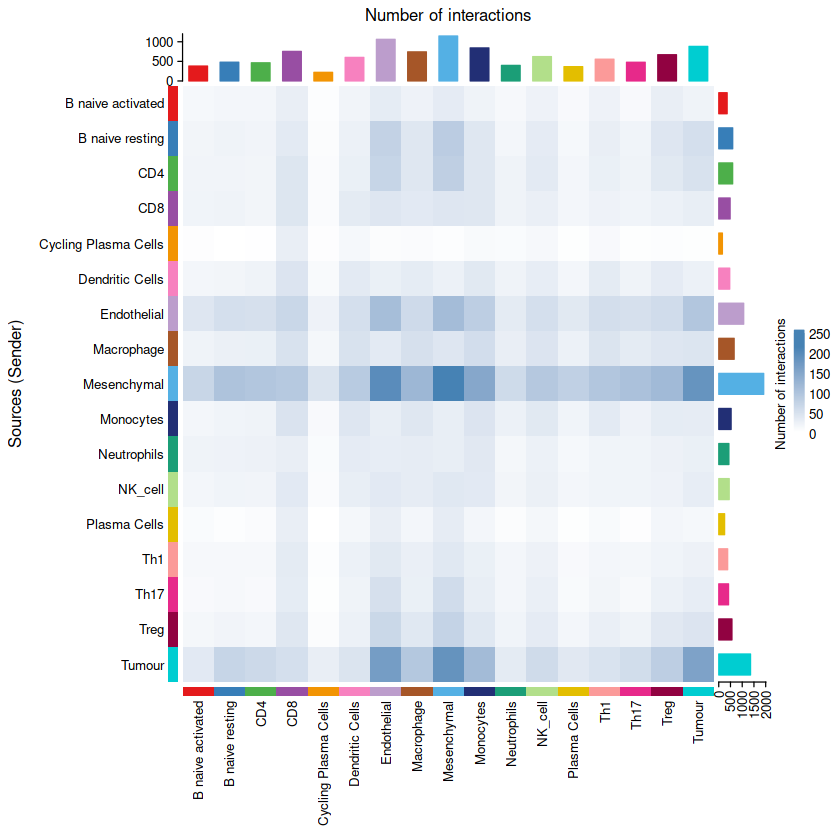

In [86]:

#Make the heatmap object (counts of significant LR pairs between sender→receiver)
ht <- netVisual_heatmap(
  object        = cellchat_pre,
  measure       = "count",
  color.heatmap = c("white", "steelblue")
)

# 3. Draw to screen
ComplexHeatmap::draw(ht)

# 4. Save to PDF
pdf(
  file = file.path(results_folder, "CellChat_Pre_heatmap.pdf"),
  width = 9,
  height = 8
)
ComplexHeatmap::draw(ht)
dev.off()


Identify the upgulated and down-regulated signaling ligand-receptor pairs

In [ ]:
#visualize number of interactions
head(cellchat_cmp@net$Pre$count)

,B naive activated,B naive resting,CD4,CD8,Cycling Plasma Cells,Dendritic Cells,Endothelial,Macrophage,Mesenchymal,Monocytes,Neutrophils,NK_cell,Plasma Cells,Th1,Th17,Treg,Tumour
B naive activated,15,17,17,30,7,20,34,24,35,23,14,24,12,24,12,30,22
B naive resting,19,23,20,37,8,26,76,42,86,42,18,35,15,30,21,43,55
CD4,20,20,19,44,9,28,72,42,81,42,23,37,18,28,22,39,50
CD8,21,22,19,44,9,36,43,38,43,42,22,29,17,24,21,26,31
Cycling Plasma Cells,6,3,4,30,6,15,8,9,7,11,10,14,5,12,5,7,5
Dendritic Cells,17,19,22,46,11,37,28,34,26,39,23,32,17,36,22,35,26


Comparing communications on a merged object 




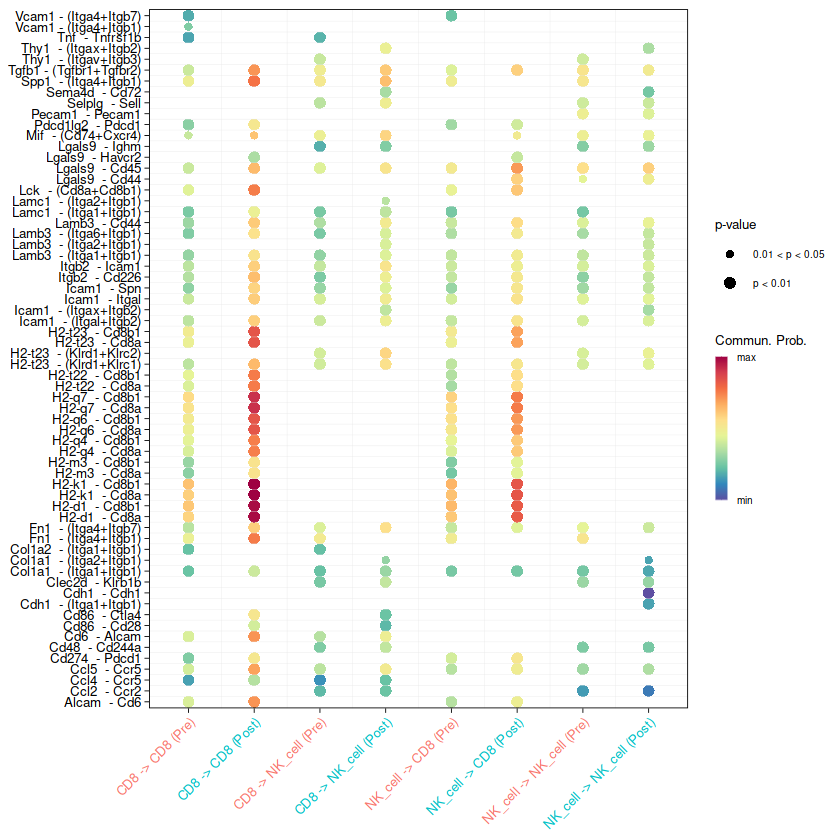

In [112]:

netVisual_bubble(cellchat_cmp,
                 comparison=c(1,2), # compare dataset 1 (pre) and 2 (post)
                 remove.isolate=TRUE, # hide cell types that have no interactions in either group)
                 sources.use= c("NK_cell",  "CD8"),# "Tumour"),
                 targets.use= c("NK_cell", "CD8"),# "Tumour"),
                 angle.x = 45
                 )

Attempts using spatial info  below

In [ ]:
adata_vis_match[[1]]@assays$RNA@data[1:5,1:5]

In [ ]:
distMats <- lapply(cellTrekObs, function(ctOb){
    obCoord <- as.matrix(ctOb@meta.data[,c("coord_x", "coord_y")])
    obDist <- CellChat::computeRegionDistance(obCoord,
                                              meta = ctOb@meta.data,
                                              contact.knn.k=10)
    return(obDist)
})

The above is seeing if it will work if I load Ollie's version unprocessed, still no result

In [ ]:
#local
cell2loc = '/run/user/1804238067/gvfs/sftp:host=clust1-sub-1,user=lythgo02/mnt/scratchc/fmlab/lythgo02/OV_visium/emily/cell2location/cellTrek/'
ov_visium = '/run/user/1804238067/gvfs/sftp:host=clust1-sub-1,user=lythgo02/mnt/scratchc/fmlab/lythgo02/OV_visium/emily/cell2location/cellTrek/'

#### Load Visium Data
ovVis <- readRDS(paste0(ov_visium, "celltrek_results.rds"))  #version of Ollie's filtered against mine

#### Load scRNA-seq
ovSc <- readRDS("/home/lythgo02/Documents/OV_visium/upk10_sc_400_newlyAnnot.rds")

In [ ]:
#convert updated annotation to factor with levels organised in alphabetical order for plotting purposes 
ovVis <- lapply(ovVis, function(i){
    i$cell_type <- ifelse(grepl("Tumour", i$updated_annotation), "Tumour",  #collapse tumour 1,2,3 subgroups into one 
                                    i$updated_annotation)  
    i$cell_type <- factor(i$cell_type,
                                    levels=sort(unique(i$cell_type)))                                                        
    return(i)
})

In [ ]:

ovVis <- lapply(ovVis, function(ovCellTrek) {
    cell_type <- as.character(ovCellTrek@meta.data$cell_type)

    #merge categories with consistently low counts across samples
    cell_type[grepl("Th", cell_type)] <- "T-helper"
    cell_type[grepl("Cycling", cell_type)] <- "Plasma Cells"
    # Add to metadata
    ovCellTrek@meta.data$cell_type_collapsed <- factor(cell_type)

    return(ovCellTrek)
})

In [ ]:
ov1 <- ovVis[[1]]
colnames(ov1@meta.data)
unique(ov1@meta.data$cell_type) #from celltrek
summary(ov1@meta.data$coord_x) #dimensions in pixels so will need converting 
ov1@images$slice1@scale.factors
ov1@images$slice1@spot.radius
slotNames(ov1[["RNA"]])


Cellchat requires normalised data
 - Ollie appears to have previously used SCTransform which is from the same authors as Cellchat (Seurat lot)
 - In their workflow they appear to use SCT data but this is the residuals after regression (like Z-scaled), given they say to use log normalised data, not scaled, will use NormaliseData function 
 - I am using the output from celltrek as input for cellchat so the normalised data is in obj[["RNA]]@data

Prepare inputs
CHECK CONVERSION OF PIXEL TO UM - CHCK THE LOGIC
 - extract normalised expression values 
 - create metadataframe with labels and treatments 
 - convert spot pixel coordinates to um for spatial.locs

In [ ]:
ovVis_input <- lapply(ovVis, function(x) {
  # Extract normalized expression matrix
  data.input <- GetAssayData(x, assay = "RNA", slot = "data")
  
  # Use full metadata from Seurat object directly for CellChat
  meta.input <- x@meta.data
  
  # Convert pixel coordinates to microns
  spot.size <- 65  # theoretical spot size in µm
  pixel.diam <- x@images$slice1@scale.factors$spot_dis  # spot diameter in pixels
  conversion.factor <- spot.size / pixel.diam           # µm per pixel
  
  spatial.locs <- as.matrix(meta.input[, c("coord_x", "coord_y")]) * conversion.factor
  colnames(spatial.locs) <- c("x", "y")
  
  scale.factors <- list(
  spot.diameter = 65,
  spot = x@images$slice1@scale.factors$spot)  # 'spot' is the pixel diameter at full-res
  
  # QC: compute nearest-neighbor distances
  d.spatial <- computeCellDistance(coordinates = spatial.locs,
                                   ratio = 1, tol = spot.size/2)
  cat("Minimum NN distance (µm):", min(d.spatial[d.spatial != 0]), "\n")
  
  # Return list with expression, metadata, spatial coordinates
  list(data = data.input, meta = meta.input, spatial = spatial.locs, scale.factors=scale.factors)
})



Visium spots:
 - The center-to-center distance between spots is ~100 µm (this comes from the array design: ~65 µm spot diameter, ~100 µm spacing).
 - If you were plotting spot coordinates directly, the nearest-neighbor distances between spots should be ~100 µm.
 - CellTrek interpolates cells within each spot. Multiple cells can occupy a single spot or nearby positions so the NN distances between cells are smaller — ~10–20 µm; cell-to-cell rather than spot-to-spot 
 - ~100 µm = nearest spots in Visium
 - ~14 µm = nearest mapped cells after CellTrek

In [ ]:
head(ovVis_input$OV_1$meta)
head(ovVis[[1]]@meta.data[, c("coord_x", "coord_y")])  # raw pixel coords
head(ovVis_input$OV_1$spatial)  
head(ovVis_input$OV_1$data)
ovVis_input$OV_1$scale.factors

In [ ]:
ov1 <- ovVis_input[[1]]
colnames(ov1$meta)
all(rownames(meta) == rownames(coordinates))
table(meta$group)
nrow(ov1$spatial)

In [ ]:
CellChatDB <- CellChatDB.mouse
showDatabaseCategory(CellChatDB)

Pick the subset of the database that you actually want to use

In [ ]:

# use a subset of CellChatDB for cell-cell communication analysis
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling") # use Secreted Signaling
# use all CellChatDB for cell-cell communication analysis
# CellChatDB.use <- CellChatDB # simply use the default CellChatDB

In [ ]:


cellchat_list <- lapply(names(ovVis_input), function(sample_name) {
  sample_data <- ovVis_input[[sample_name]]
  
  cellchat <- CellChat::createCellChat(
    object = sample_data$data,
    meta = sample_data$meta,
    group.by = "cell_type_collapsed",                 # adjust to the column name in meta for cell types
    coordinates = sample_data$spatial,
    datatype = "spatial",
    #scale.factors = sample_data$scale.factors,
    spatial.factors = data.frame(ratio = 1, tol = 32.5),  # adjust tol if needed
    do.sparse=TRUE
  )
  
  # Set CellChat database (optional: replace with the specific database you want to use)
  cellchat@DB <- CellChatDB.mouse  # or CellChatDB.use if you loaded a custom DB
  
  return(cellchat)
})

names(cellchat_list) <- names(ovVis_input)



In [ ]:
cellchat <- cellchat_list[[1]]
levels(cellchat@idents)
groupSize <- as.numeric(table(cellchat@idents)) # cells per type
groupSize
slotNames(cellchat) #data.raw is only populated if you provide the raw counts which aren't actually required by cellchat



In [ ]:

library(presto)

# Subset data to relevant genes and ligand-receptor pairs
cellchat <- subsetData(cellchat)

In [ ]:
cellchat@spatial


In [ ]:

cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
cellchat <- computeCommunProb(cellchat, raw.use = FALSE)
cellchat <- filterCommunication(cellchat, min.cells = 10)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)
